In [11]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [12]:
folder_path = r"C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 01 - DIPU\Estimation\wind\clusterOnshore"
file_prefix = "cluster_"

csv_files = [file for file in os.listdir(folder_path) if file.startswith(file_prefix)]
concatenated_df = pd.DataFrame()
zero_count = 0
previous_dataframe = ""

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, index_col=0)
    data.drop(data.tail(1).index, inplace=True)

    # Update the previous dataframe variable
    previous_dataframe = file

    # Remove zeros from the dataframe
    data = data[data != 0]

    # Count the number of zeros removed
    zero_count += (data == 0).sum().sum()

    # Add a column with the name of the previous dataframe
    data['Previous_Dataframe'] = previous_dataframe

    # Add a column with the index as pd timestamp
    data['Timestamp'] = pd.to_datetime(data.index)

    # Extract the month from the timestamp and create a "month" column
    data['Year'] = data['Timestamp'].dt.year

    # Concatenate the dataframe with the previous ones
    concatenated_df = pd.concat([concatenated_df, data])

# Reset the index of the concatenated dataframe
concatenated_df.reset_index(drop=True, inplace=True)


In [13]:
cluster_0 = concatenated_df[concatenated_df['Previous_Dataframe']=="cluster_0.csv"]

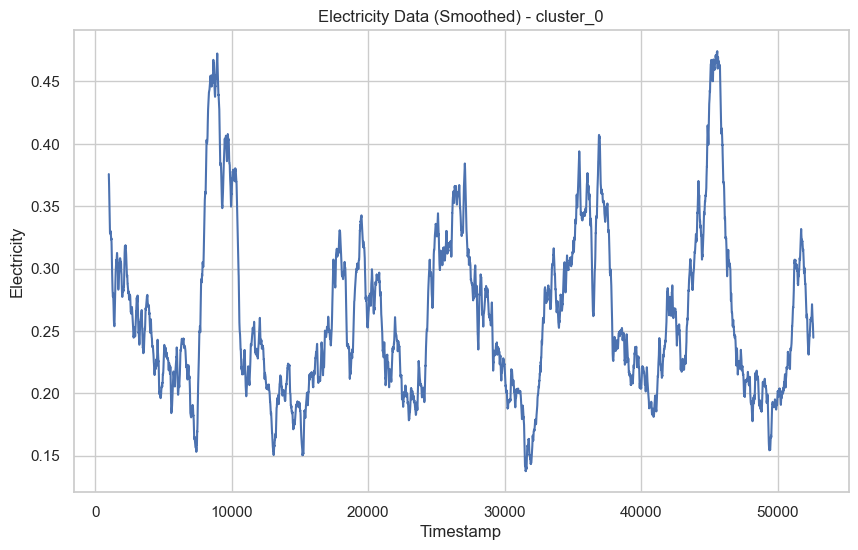

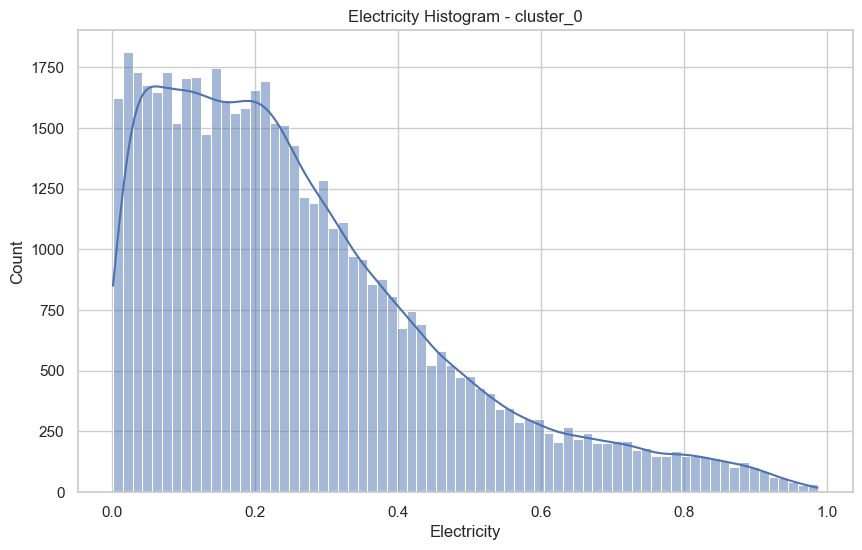

In [14]:
# Apply a rolling window with a window size of 7 to smooth the line plot
smoothed_data = cluster_0['electricity'].rolling(window=1000).mean()

# Plot the smoothed data using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=smoothed_data)
plt.title('Electricity Data (Smoothed) - cluster_0')
plt.xlabel('Timestamp')
plt.ylabel('Electricity')
plt.show()

# Create a histogram with KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_0, x='electricity', kde=True)
plt.title('Electricity Histogram - cluster_0')
plt.xlabel('Electricity')
plt.ylabel('Count')
plt.show()

In [15]:
# Assuming you have the "cluster_0" dataframe

# Extract the "electricity" column
electricity_data = cluster_0['electricity']

# Reshape the data for GMM fitting
electricity_data = electricity_data.values.reshape(-1, 1)

# Estimate Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)  # Number of components is set to 2 as an example
gmm.fit(electricity_data)

# Get the predicted labels for the data points
labels = gmm.predict(electricity_data)

# Add the labels as a new column in the dataframe
cluster_0['GMM_Labels'] = labels

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_16632\898089393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['GMM_Labels'] = labels
